In [ ]:
#21BAI10030 KUHOO CHANDRA

## DATA MINING CONCEPTS COVERED IN THIS TASK


1.   statistical description of data
2.   exploratory data analysis
3.   data visualization
4. data reduction
5. data transformation - scaling and encoding
6. classification model- training & evaluation
7. prediction



## DATASET: https://www.kaggle.com/datasets/sampadab17/network-intrusion-detection


In [ ]:
#import relevant modules
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

##LOAD DATA


In [ ]:
train = pd.read_csv("/content/Train_data.csv")
test = pd.read_csv("/content/Test_data.csv")

In [ ]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
train.shape

(25192, 42)

In [ ]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [ ]:
test.shape

(22544, 41)

## EXPLORATORY ANALYSIS

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [ ]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [ ]:
train['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

#DATA-PREPROCESSING

### DROPPING IRRELEVANT CLASSES

In [ ]:
train['num_outbound_cmds'].value_counts

<bound method IndexOpsMixin.value_counts of 0        0
1        0
2        0
3        0
4        0
        ..
25187    0
25188    0
25189    0
25190    0
25191    0
Name: num_outbound_cmds, Length: 25192, dtype: int64>

In [ ]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

### SCALING NUMERICAL ATTRIBUTES

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols = train.select_dtypes(include=['float64', 'int64']).columns

sc_traindf = pd.DataFrame(scaler.fit_transform(train.select_dtypes(include=['float64', 'int64'])), columns=cols)
sc_testdf = pd.DataFrame(scaler.fit_transform(test.select_dtypes(include=['float64', 'int64'])), columns = cols)


### ENCODING CATEGORICAL ATTRIBUTES

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

#extract categorical attributes
cattrain = train.select_dtypes(include=['object']).copy()
cattest = test.select_dtypes(include=['object']).copy()

#encode
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

#seperate X and y
enctrain = traincat.drop(['class'], axis=1)
cat_Ytrain = traincat[['class']].copy()

In [ ]:
train_x = pd.concat([sc_traindf, enctrain], axis=1)
train_y = train['class']

In [ ]:
test_df = pd.concat([sc_testdf, testcat], axis=1)

# FEATURE SELECTION (AND VISUALISATION) FOR DIMENSIONALITY REDUCTION

<Axes: xlabel='feature'>

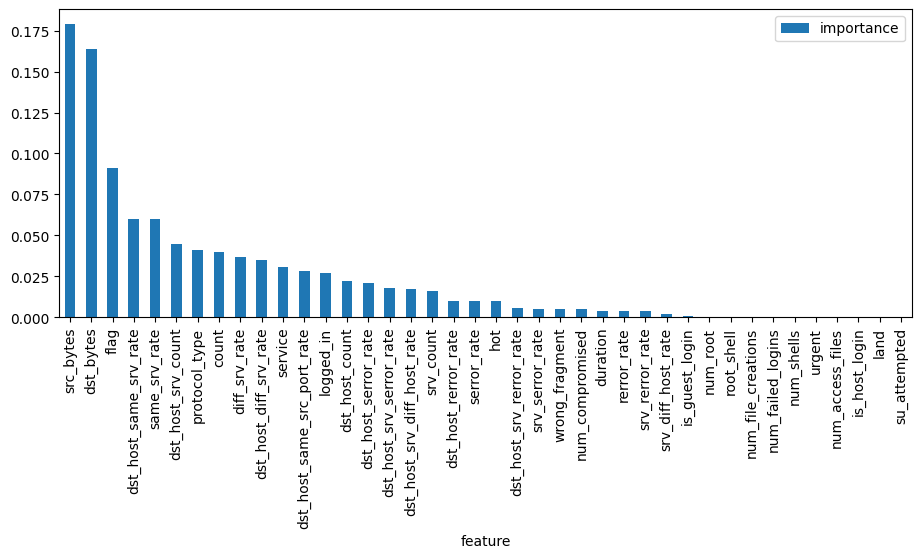

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(train_x, train_y) #fit rfc to train set

#extract importance score
score = np.round(rfc.feature_importances_, 3)
importances = pd.DataFrame({'feature':train_x.columns, 'importance':score})
importances = importances.sort_values('importance', ascending=False).set_index('feature')

#plot importances
plt.rcParams['figure.figsize'] = (11,4)
importances.plot.bar()

In [ ]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(train_x, train_y)

feature_map = [(i,v) for i, v in itertools.zip_longest(rfe.get_support(), train_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['src_bytes',
 'dst_bytes',
 'hot',
 'count',
 'srv_count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'protocol_type',
 'service',
 'flag']

#DATASET SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, train_size = 0.70, random_state=42)

#MODEL TRAINING

In [ ]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression(n_jobs=-1, random_state=0)
lgr.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, random_state=0)

#EVALUATE MODULE

In [ ]:
from sklearn import metrics

scores = sklearn.model_selection.cross_val_score(lgr, X_train, y_train, cv=10)
accuracy = metrics.accuracy_score(y_train, lgr.predict(X_train))
confusion_matrix = metrics.confusion_matrix(y_train, lgr.predict(X_train))
classification = metrics.classification_report(y_train, lgr.predict(X_train))

In [ ]:
print("Cross Validation Mean Score", scores.mean())

Cross Validation Mean Score 0.953328850920213


In [ ]:
print("Accuracy:", accuracy)

Accuracy: 0.954633095157083


In [ ]:
print("Confusion Matrix: \n", confusion_matrix)

Confusion Matrix: 
 [[7736  491]
 [ 309 9098]]


In [ ]:
print("Classification Report: \n", classification)

Classification Report: 
               precision    recall  f1-score   support

     anomaly       0.96      0.94      0.95      8227
      normal       0.95      0.97      0.96      9407

    accuracy                           0.95     17634
   macro avg       0.96      0.95      0.95     17634
weighted avg       0.95      0.95      0.95     17634



# VALIDATING MODELS

In [ ]:
from sklearn import metrics

acc = metrics.accuracy_score(y_test, lgr.predict(X_test))
con_mat = metrics.confusion_matrix(y_test, lgr.predict(X_test))
classification = metrics.classification_report(y_test, lgr.predict(X_test))

In [ ]:
print("Accuracy:", acc)
print("Confusion Matrix: \n", con_mat)
print("Classification Report: \n", classification)

Accuracy: 0.9560730351944959
Confusion Matrix: 
 [[3328  188]
 [ 144 3898]]
Classification Report: 
               precision    recall  f1-score   support

     anomaly       0.96      0.95      0.95      3516
      normal       0.95      0.96      0.96      4042

    accuracy                           0.96      7558
   macro avg       0.96      0.96      0.96      7558
weighted avg       0.96      0.96      0.96      7558



# PREDICTION

In [ ]:
pred = lgr.predict(test_df)
print(pred)

['anomaly' 'anomaly' 'normal' ... 'normal' 'normal' 'anomaly']
